# Auto insurance. Interview questions

In [1]:
# from ds_preamble import *
# import numpy as np
# import pandas as pd
# pd.set_option('display.max_rows',85)
# pd.set_option('display.max_columns',85)
# from sklearn.linear_model import LinearRegression
# import matplotlib.pyplot as plt
# from IPython.core.interactiveshell import InteractiveShell; InteractiveShell.ast_node_interactivity = "all"

from ds_utils.ds_preamble import *
from ds_utils.ds_plotting import *
from ds_utils.ds_helper import *

calling ds_preamble..
calling ds_helper...


In [2]:
df = pd.read_csv('data.csv')
df.info()

df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67856 entries, 0 to 67855
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   vehicle_value  67062 non-null  float64
 1   exposure       67856 non-null  float64
 2   claim          67856 non-null  int64  
 3   claim_count    67856 non-null  int64  
 4   claim_cost     67856 non-null  float64
 5   vehicle_type   67856 non-null  object 
 6   vehicle_age    67185 non-null  float64
 7   owner_gender   67856 non-null  object 
 8   owner_area     67856 non-null  object 
 9   owner_age      66289 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 5.2+ MB


,vehicle_value,exposure,claim,claim_count,claim_cost,vehicle_type,vehicle_age,owner_gender,owner_area,owner_age
0,10600.0,0.303901,0,0,0.000000,HBACK,3.0,F,C,2.0
1,10300.0,0.648871,0,0,0.000000,HBACK,2.0,F,A,4.0
2,32600.0,0.569473,0,0,0.000000,UTE,2.0,F,E,2.0
3,41400.0,0.317591,0,0,0.000000,STNWG,2.0,F,D,2.0
4,7200.0,0.648871,0,0,0.000000,HBACK,4.0,F,C,2.0
...,...,...,...,...,...,...,...,...,...,...
67851,10700.0,0.654346,0,0,0.000000,SEDAN,2.0,M,A,6.0
67852,12300.0,0.908966,0,0,0.000000,SEDAN,4.0,M,C,3.0
67853,19300.0,0.312115,0,0,0.000000,STNWG,4.0,M,C,3.0
67854,9700.0,0.320329,1,1,7646.769989,HBACK,3.0,F,C,2.0


In [3]:
# M1: find columns with na first
cols_na = df.columns[df.isna().any()]
df.loc[:, cols_na].isna().mean().sort_values(ascending=False)

# M2:
df.isna().mean().sort_values(ascending=False)[lambda x: x>0]

owner_age        0.023093
vehicle_value    0.011701
vehicle_age      0.009889
dtype: float64

owner_age        0.023093
vehicle_value    0.011701
vehicle_age      0.009889
dtype: float64

In [4]:
df.dtypes

vehicle_value    float64
exposure         float64
claim              int64
claim_count        int64
claim_cost       float64
vehicle_type      object
vehicle_age      float64
owner_gender      object
owner_area        object
owner_age        float64
dtype: object

In [5]:
k = 3
top_k_vehicle_types = df.vehicle_type.value_counts().nlargest(k).index
# top_k_vehicle_types
# df.query("vehicle_type in @top_k_vehicle_types").vehicle_type.unique() # sanity check 
# df.query("vehicle_type in @top_k_vehicle_types").groupby('owner_area').claim_cost.mean()
df.query("vehicle_type in @top_k_vehicle_types").groupby('owner_area').claim_cost.mean().nlargest(1)

owner_area
F    202.131412
Name: claim_cost, dtype: float64

In [6]:
# df.fillna('median').dtypes
# df.fillna(df.median()).dtypes

In [7]:
df.dtypes
df = df.fillna(df.median())
# (df.vehicle_value == 'median').sum()

vehicle_value    float64
exposure         float64
claim              int64
claim_count        int64
claim_cost       float64
vehicle_type      object
vehicle_age      float64
owner_gender      object
owner_area        object
owner_age        float64
dtype: object

/var/folders/c2/yj8ksjmn34v5f9csr1s82d8r0000gn/T/ipykernel_1244/123711194.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.median())


In [8]:
df.vehicle_type.value_counts()
corrected = df.vehicle_type.str.upper().str.replace('[^A-Z]', '')
df['vehicle_type'] = corrected
df.vehicle_type.value_counts()

SEDAN       22200
HBACK       18892
STNWG       16244
UTE          4580
OTHER        2532
TRUCK        1749
HDTOP        1577
sedan          27
hback          20
stnwg          12
ute             6
STNWG/          2
hdtop           2
SEDAN&&         2
SEDAN@          2
STNWG^          1
SEDAN#.         1
truck           1
STNWG.49        1
STNWG@          1
HBACK#.         1
SEDAN.49        1
HBACK.49        1
HBACK@          1
Name: vehicle_type, dtype: int64

/var/folders/c2/yj8ksjmn34v5f9csr1s82d8r0000gn/T/ipykernel_1244/2196178579.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  corrected = df.vehicle_type.str.upper().str.replace('[^A-Z]', '')


SEDAN    22233
HBACK    18915
STNWG    16261
UTE       4586
OTHER     2532
TRUCK     1750
HDTOP     1579
Name: vehicle_type, dtype: int64

In [9]:
df.dtypes

vehicle_value    float64
exposure         float64
claim              int64
claim_count        int64
claim_cost       float64
vehicle_type      object
vehicle_age      float64
owner_gender      object
owner_area        object
owner_age        float64
dtype: object

In [10]:
df['vehicle_value_cat'] = pd.cut(df.vehicle_value, [0,20_000, 60_000, 100_000, np.inf], right=False, labels=['LOW', 'MIDDLE', 'HIGH', 'VHIGH'])

In [39]:
cols_unwanted = ['claim','exposure','claim_count']
cols_to_use = df.select_dtypes('number').columns.drop(cols_unwanted) # use use difference
df_to_use = df[cols_to_use]
df[cols_to_use] = (df_to_use - df_to_use.mean())/df_to_use.std()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67856 entries, 0 to 67855
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   vehicle_value             67856 non-null  float64
 1   exposure                  67856 non-null  float64
 2   claim                     67856 non-null  int64  
 3   claim_count               67856 non-null  int64  
 4   claim_cost                67856 non-null  float64
 5   vehicle_age               67856 non-null  float64
 6   owner_age                 67856 non-null  float64
 7   vehicle_type_HBACK        67856 non-null  uint8  
 8   vehicle_type_HDTOP        67856 non-null  uint8  
 9   vehicle_type_OTHER        67856 non-null  uint8  
 10  vehicle_type_SEDAN        67856 non-null  uint8  
 11  vehicle_type_STNWG        67856 non-null  uint8  
 12  vehicle_type_TRUCK        67856 non-null  uint8  
 13  vehicle_type_UTE          67856 non-null  uint8  
 14  owner_

0.9999999979026479

-0.20322843186383466

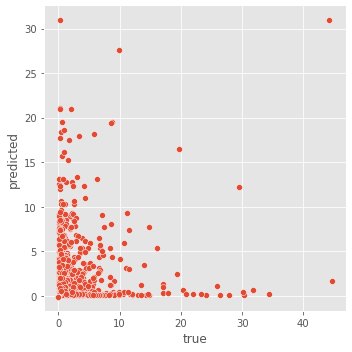

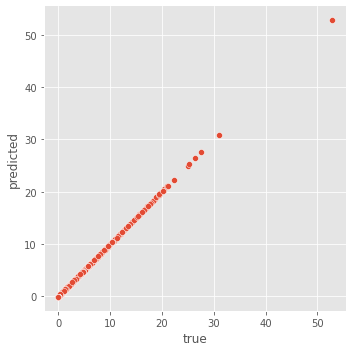

In [76]:
df.info()
df = pd.get_dummies(df)

X=df.drop(columns='claim_cost')
y=df.claim_cost

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=123)

model = DecisionTreeRegressor(max_depth=3).fit(X_train,y_train)
model.score(X_train,y_train)
model.score(X_test,y_test)

y_pred = model.predict(X_test)
sns.relplot(x=y_test, y=y_pred, kind='scatter').set(ylabel='predicted', xlabel='true')
sns.relplot(x=y_train, y=model.predict(X_train), kind='scatter').set(ylabel='predicted', xlabel='true')